In [1]:
## if you use google colab add the following library to read files in drive
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt ## the core data visualization library for displaying these graphically data.
from sklearn import preprocessing
import seaborn as sns
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
data= pd.read_csv('/content/drive/MyDrive/pollingData.csv')
data

,State,Yes,No,Total,PercentYes,PercentNo
0,Delaware,228,111,339,0.67,0.33
1,New Mexico,108,63,171,0.63,0.37
2,North Carolina,724,429,1153,0.63,0.37
3,Nevada,213,127,340,0.63,0.37
4,Ohio,988,607,1595,0.62,0.38
5,Arizona,332,204,536,0.62,0.38
6,Mississipi,242,151,393,0.62,0.38
7,South Carolina,235,148,383,0.61,0.39
8,Indiana,595,376,971,0.61,0.39
9,Maryland,512,326,838,0.61,0.39


In [5]:
data.head(5)

,State,Yes,No,Total,PercentYes,PercentNo
0,Delaware,228,111,339,0.67,0.33
1,New Mexico,108,63,171,0.63,0.37
2,North Carolina,724,429,1153,0.63,0.37
3,Nevada,213,127,340,0.63,0.37
4,Ohio,988,607,1595,0.62,0.38


### Simple Linear Regression

In [7]:
from sklearn import linear_model
from sklearn.linear_model import  LinearRegression

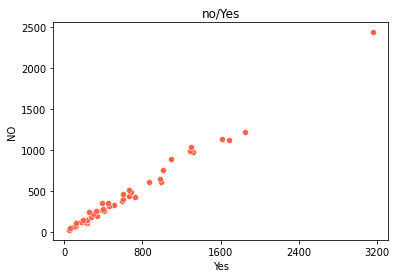

In [16]:
ax = sns.scatterplot(x="Yes", y="No", data=data,color="tomato")
ax.set(xlabel='Yes', ylabel='NO',title="no/Yes")
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

In [17]:
reg_simp = smf.ols('No ~ Yes', data=data).fit()

In [18]:
print(reg_simp.summary())

                            OLS Regression Results                            
Dep. Variable:                     No   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     3590.
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           8.91e-47
Time:                        10:07:06   Log-Likelihood:                -265.93
No. Observations:                  50   AIC:                             535.9
Df Residuals:                      48   BIC:                             539.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.2710     10.169     -1.108      0.2

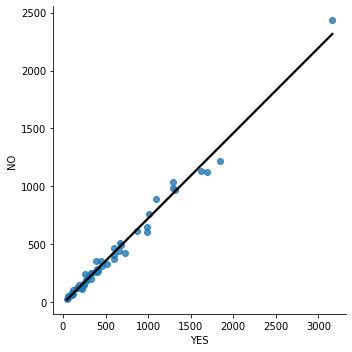

In [21]:
ax = sns.lmplot(x="Yes", y="No", data=data, ci=None, line_kws={'color':'black'})
ax.set(xlabel='YES', ylabel='NO')
plt.show()

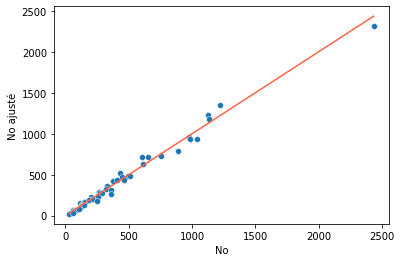

In [22]:
data['No_ajust_s'] = reg_simp.predict()

X_plot = [data['No'].min(), data['No'].max()]

ax = sns.scatterplot(x="No", y="No_ajust_s", data=data)
ax.set(xlabel='No', ylabel='No ajusté')
plt.plot(X_plot, X_plot, color='tomato')
plt.show()

### Multiple linear regression

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels


In [27]:
data.head(1)

,State,Yes,No,Total,PercentYes,PercentNo,No_ajust_s
0,Delaware,228,111,339,0.67,0.33,156.46385


In [28]:
reg_multi = smf.ols('No~Yes+PercentYes+PercentNo', data=data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                     No   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     3289.
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           3.13e-51
Time:                        10:14:06   Log-Likelihood:                -250.42
No. Observations:                  50   AIC:                             506.8
Df Residuals:                      47   BIC:                             512.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.8053     10.460      4.857      0.0